In [1]:
import numpy as np
import pandas as pd

## Tìm các véc-tơ riêng

In [2]:
s=np.array([[1,-2],[-2,5]])
print(s)

[[ 1 -2]
 [-2  5]]


In [3]:
d,v=np.linalg.eigh(s)
print(d.round(2))
print(v.round(2))

[0.17 5.83]
[[-0.92 -0.38]
 [-0.38  0.92]]


In [4]:
d

array([0.17157288, 5.82842712])

In [5]:
v

array([[-0.92387953, -0.38268343],
       [-0.38268343,  0.92387953]])

In [6]:
v[0]

array([-0.92387953, -0.38268343])

In [7]:
v[:,0].dot(s.dot(v[:,0].T))

0.17157287525380993

In [8]:
print(s)

[[ 1 -2]
 [-2  5]]


In [9]:
s[0],s[1]

(array([ 1, -2]), array([-2,  5]))

In [10]:
s[:,0],s[:,1]

(array([ 1, -2]), array([-2,  5]))

### Tìm các thành phần chính

In [11]:
x=np.array([1,2,1,
            4,2,13,
            7,8,1,
            8,4,5]).reshape(4,3)
print(x)

[[ 1  2  1]
 [ 4  2 13]
 [ 7  8  1]
 [ 8  4  5]]


In [12]:
x_mean=x.mean(axis=0)
print(x_mean)

[5. 4. 5.]


In [13]:
x_c=x-x_mean
print(x_c)

[[-4. -2. -4.]
 [-1. -2.  8.]
 [ 2.  4. -4.]
 [ 3.  0.  0.]]


In [14]:
(n,m)=x.shape


In [15]:
# Ma tran hiep phuong sai
S=1/n*x_c.T.dot(x_c)
print(S)

[[ 7.5  4.5  0. ]
 [ 4.5  6.  -6. ]
 [ 0.  -6.  24. ]]


In [16]:
lam,v=np.linalg.eigh(S)
print(lam.round(3))
print(v.round(3))

[ 1.204 10.382 25.913]
[[ 0.569  0.819 -0.074]
 [-0.796  0.525 -0.303]
 [-0.209  0.231  0.95 ]]


In [17]:
y=x_c@v

In [18]:
np.round(y.T@y/4,4)

array([[ 1.2043, -0.    ,  0.    ],
       [-0.    , 10.3822, -0.    ],
       [ 0.    , -0.    , 25.9135]])

In [19]:
Uk=np.vstack([v[:,2],v[:,1]]).T
Uk.shape

(3, 2)

In [20]:
Z=x_c@Uk

In [21]:
import matplotlib.pyplot as plt

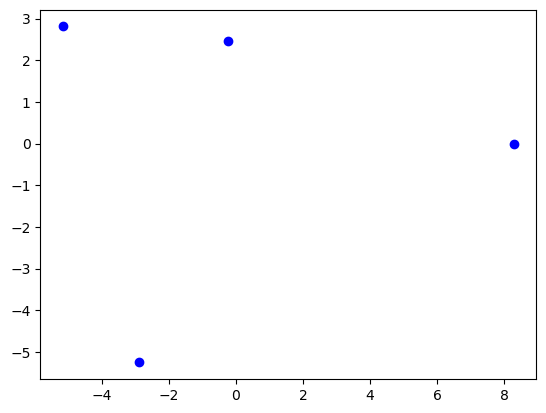

In [22]:
#plt.figure(figsize=(4,4))
import matplotlib.pyplot as plt
plt.scatter(Z[:,0],Z[:,1],c='blue')
plt.show()

In [23]:
#np.linalg.eigh(C)

# Phân tích thành phần chính - IRIS dataset

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
x=iris.data
y=iris.target

In [25]:
iris = load_iris()

In [26]:
x=iris.data

In [27]:
y=iris.target

In [28]:
x.shape

(150, 4)

In [29]:
x[0,:]

array([5.1, 3.5, 1.4, 0.2])

In [30]:
x.shape

(150, 4)

In [31]:
m=np.mean(x,axis=0)

In [32]:
m

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [33]:
xh=x-m

In [34]:
xh[0,:]

array([-0.74333333,  0.44266667, -2.358     , -0.99933333])

In [35]:
C=1/len(xh)*xh.T.dot(xh)

In [36]:
C

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

In [37]:
d,v=np.linalg.eigh(C)

In [38]:
d

array([0.02367619, 0.0776881 , 0.24105294, 4.20005343])

In [39]:
v

array([[ 0.31548719,  0.58202985,  0.65658877, -0.36138659],
       [-0.3197231 , -0.59791083,  0.73016143,  0.08452251],
       [-0.47983899, -0.07623608, -0.17337266, -0.85667061],
       [ 0.75365743, -0.54583143, -0.07548102, -0.3582892 ]])

In [40]:
y=xh.dot(v)

In [41]:
s=y.T.dot(y)

In [42]:
print(s)

[[ 3.55142885e+00  4.63624674e-14  1.95264054e-14  7.74625839e-14]
 [ 4.63624674e-14  1.16532155e+01  5.19103555e-14  1.00480961e-13]
 [ 1.95264054e-14  5.19103555e-14  3.61579414e+01 -6.62471850e-15]
 [ 7.74625839e-14  1.00480961e-13 -6.62471850e-15  6.30008014e+02]]


In [43]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
z = pca.fit_transform(x)

In [44]:
pca = PCA(n_components=2)

In [45]:
z = pca.fit(x).transform(x)

In [46]:
id1=y==0
id2=y==1
id3=y==2
plt.scatter(z[id1,0],z[id1,1],c='r')
plt.scatter(z[id2,0],z[id2,1],c='g')
plt.scatter(z[id3,0],z[id3,1],c='b')
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
#scipy.sparse.linalg.eigs
#scipy.sparse.linalg.eigs(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, OPpart=None)

In [ ]:
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import eigsh

In [ ]:
vals, vecs = eigsh(C, k=2,which='LM')
# largest magnitude

In [ ]:
vals

In [ ]:
vecs

In [ ]:
z=xh.dot(vecs)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure()
plt.scatter(z[:,0],z[:,1])
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pct = pca.fit_transform(x)

In [ ]:
plt.figure()
plt.scatter(pct[:,0],pct[:,1])
plt.show()

### Phương pháp KPCA

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=0.5) #“linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”
z= kpca.fit_transform(x)

In [ ]:
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=0.5) #“linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”
z= kpca.fit_transform(x)

In [ ]:
id1=y==0
id2=y==1
id3=y==2
plt.scatter(z[id1,0],z[id1,1],c='r')
plt.scatter(z[id2,0],z[id2,1],c='g')
plt.scatter(z[id3,0],z[id3,1],c='b')
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
x=iris_kpca

plt.scatter(x[red, 0], x[red, 1], c="red")#, s=20, edgecolor='k')
plt.scatter(x[blue, 0], x[blue, 1], c="blue")#, s=20, edgecolor='k')
plt.scatter(x[green, 0], x[green, 1], c="green")#, s=20, edgecolor='k')

plt.title("Projection  Iris by KPCA")

In [ ]:
# KPCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA


In [ ]:
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=400, factor=.3, noise=.05)

In [ ]:
reds = y == 0
blues = y == 1

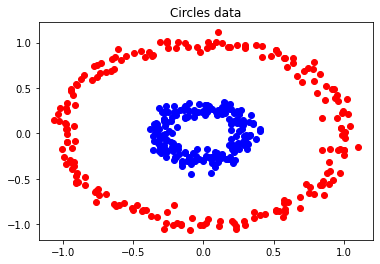

In [ ]:
plt.scatter(x[reds, 0], x[reds, 1], c="red")#,            s=20, edgecolor='k')
plt.scatter(x[blues, 0], x[blues, 1], c="blue")#           s=20, edgecolor='k')
plt.title("Circles data")
plt.show()

In [ ]:
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5) 
z = kpca.fit_transform(x)

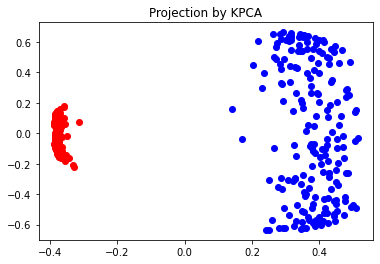

In [ ]:
plt.scatter(z[reds, 0], z[reds, 1], c="red")#,          s=20, edgecolor='k')
plt.scatter(z[blues, 0], z[blues, 1], c="blue")#,            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.show()